# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset yang saya gunakan adalah dataset dari Kaggle yang diberikan sebagai contoh dataset oleh pihak Dicoding untuk menyelesaikan Submission kelas ini, nama datasetnya adalah [Bank Transaction Dataset for Fraud Detection](https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection). Dataset ini dirancang untuk analisis transaksi perbankan, sering kali digunakan untuk mendeteksi pola atau anomali.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas. Ketentuan ini sudah terpenuhi, karena setelah saya cek di Dataset ini belum ada label.
   - **Jumlah Baris**: Dataset yang saya  gunakan setelah dicek terdapat 2512 baris berdasarkan informasi dari Kaggle.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**. Dataset saya mengandung kombinasi data kategorikal dan numerikal, sesuai dengan ketentuan yang diberikan. Berikut adalah rinciannya berdasarkan kolom yang ada
     - *Kategorikal*: Beberapa diantaranya adalah Channel (Onlin/ATM/Branch), TransactionType, CostumerOccupation.
     - *Numerikal*: Contohnya CustomerAge, AccountBalance, TransactionAmount

3. **Pembatasan**:  
   Dataset yang saya gunakan tidak termausk dataset yang pernah dilakukan latihan clustering.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [ ]:
# Import library untuk manipulasi data
import pandas as pd
import numpy as np
import scipy.stats as stats

# Import library untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Import library untuk preprocessing dan clustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Pada bagian ini saya memuat dataset dari file CSV yang saya input langsung ke google colab. Kemudian setelah itu saya menampilkan 5 data teratas, dan juga menampilkan info dasar dataset.

In [ ]:
# Memuat dataset dari file CSV
file_path = '/content/bank_transactions_data_2.csv'
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama
print("5 Baris Pertama Dataset:")
display(df.head())

# Menampilkan informasi dasar dataset
print("\nInformasi Dataset:")
df.info()

5 Baris Pertama Dataset:


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39



Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  Acco

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## **4.1 Struktur Data**

In [ ]:
# Menampilkan jumlah baris dan kolom
print("Jumlah baris dan kolom:", df.shape)

# Menampilkan tipe data setiap kolom
print("\nTipe data setiap kolom:\n", df.dtypes)


Jumlah baris dan kolom: (2512, 16)

Tipe data setiap kolom:
 TransactionID               object
AccountID                   object
TransactionAmount          float64
TransactionDate             object
TransactionType             object
Location                    object
DeviceID                    object
IP Address                  object
MerchantID                  object
Channel                     object
CustomerAge                  int64
CustomerOccupation          object
TransactionDuration          int64
LoginAttempts                int64
AccountBalance             float64
PreviousTransactionDate     object
dtype: object


## **4.2 Menangani Data yang Hilang**

In [ ]:
# Memeriksa missing values
print("\nMissing values per kolom:\n", df.isnull().sum())


Missing values per kolom:
 TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


Karena tidak ada mssing values, maka tidak memerlukan penanganan missing values

## **4.3 Analsisis Distribusi dan Korelasi**

In [ ]:
# Menampilkan statistik dasar dataset
display(df.describe(include="all"))

# Menghitung korelasi antar variabel numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()
print("\nMatriks Korelasi Variabel Numerik:\n", corr_matrix)


,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512,2512,2512.000000,2512,2512,2512,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,2512,495,NaN,2512,2,43,681,592,100,3,NaN,4,NaN,NaN,NaN,360
top,TX002512,AC00460,NaN,2023-02-14 16:21:23,Debit,Fort Worth,D000663,200.136.146.93,M026,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,1,12,NaN,1,1944,70,9,13,45,868,NaN,657,NaN,NaN,NaN,16
mean,NaN,NaN,297.593778,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,NaN
std,NaN,NaN,291.946243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499,NaN
min,NaN,NaN,0.260000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,NaN,NaN,81.885000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,NaN
50%,NaN,NaN,211.140000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,NaN
75%,NaN,NaN,414.527500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,NaN



Matriks Korelasi Variabel Numerik:
                      TransactionAmount  CustomerAge  TransactionDuration  \
TransactionAmount             1.000000    -0.025616             0.004359   
CustomerAge                  -0.025616     1.000000            -0.017936   
TransactionDuration           0.004359    -0.017936             1.000000   
LoginAttempts                -0.008445     0.007653             0.032639   
AccountBalance               -0.025165     0.319942             0.005577   

                     LoginAttempts  AccountBalance  
TransactionAmount        -0.008445       -0.025165  
CustomerAge               0.007653        0.319942  
TransactionDuration       0.032639        0.005577  
LoginAttempts             1.000000        0.014999  
AccountBalance            0.014999        1.000000  


## **4.4 Visualisasi Data**



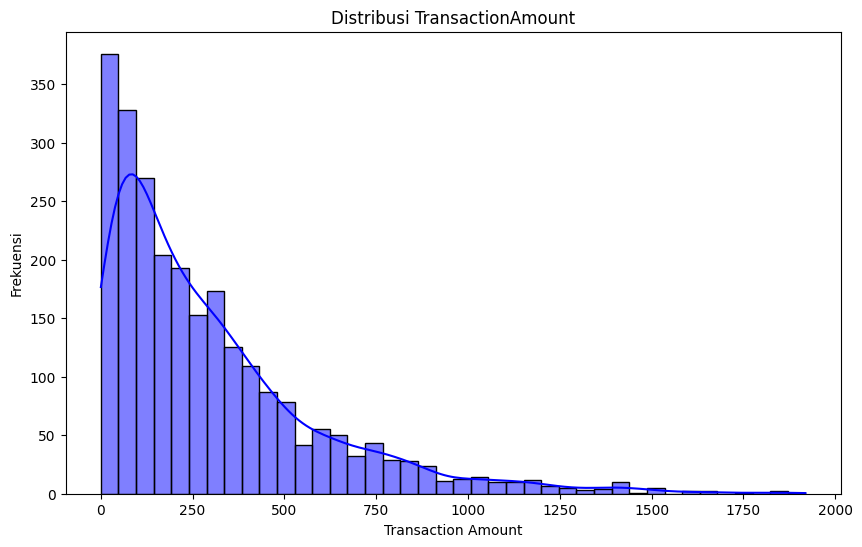

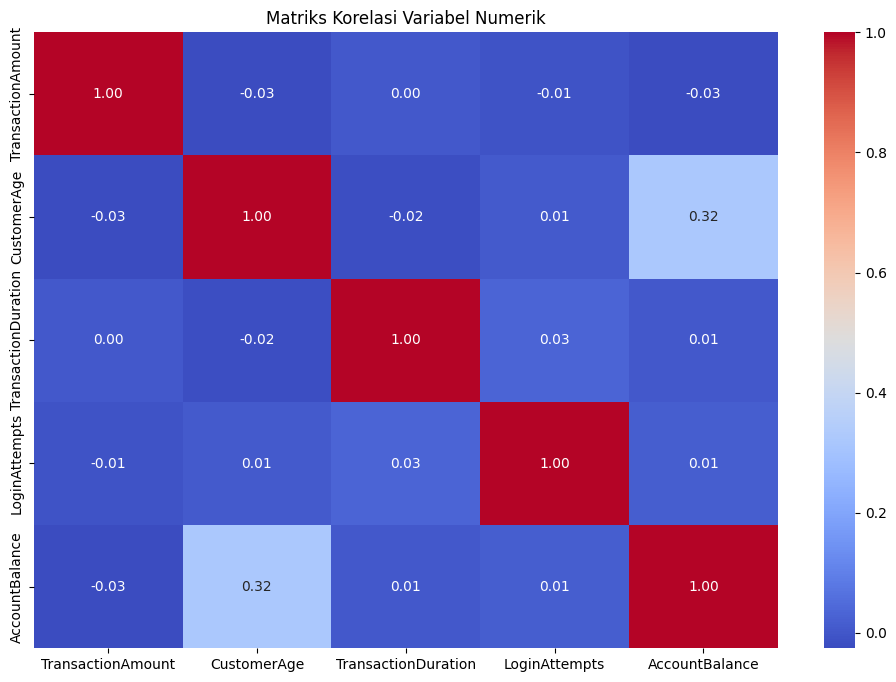

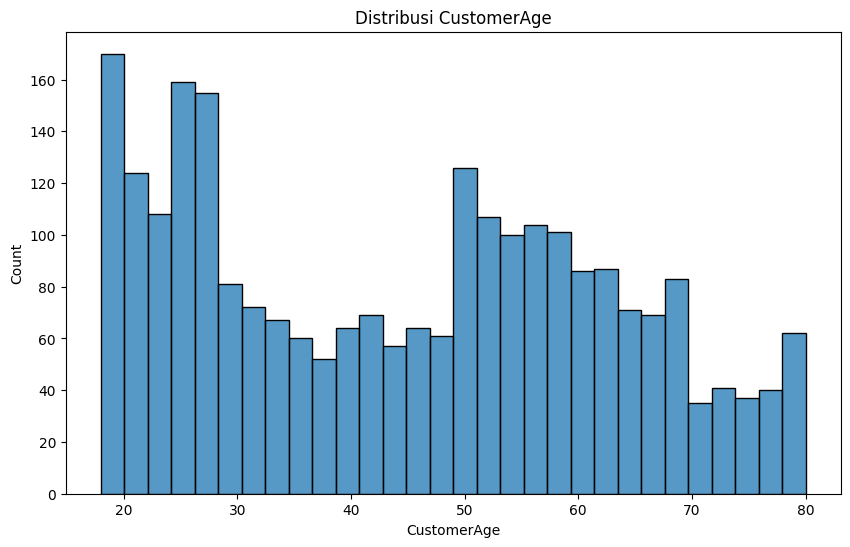

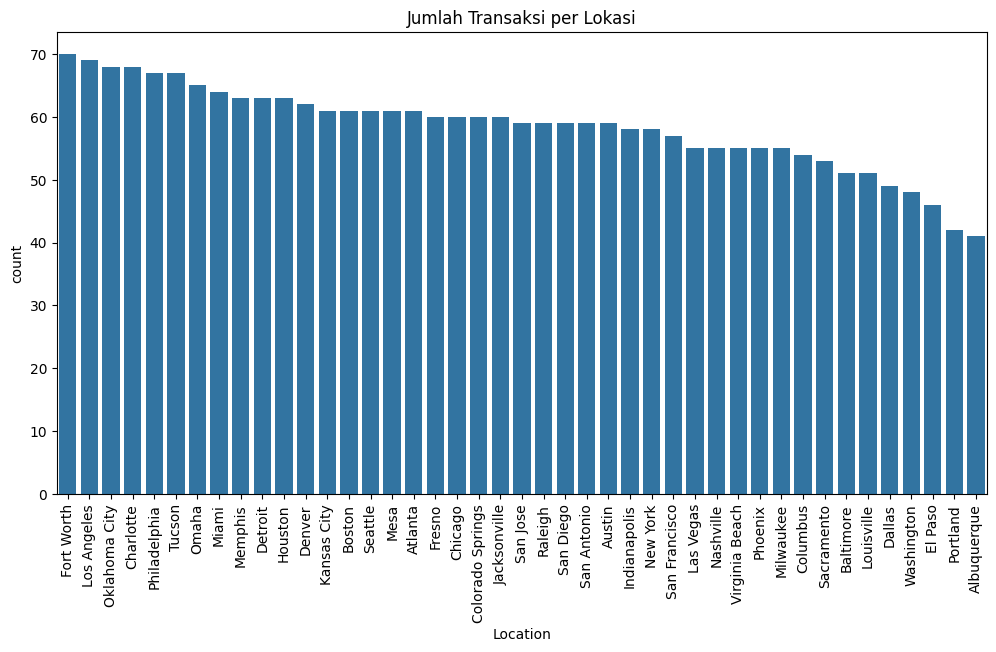

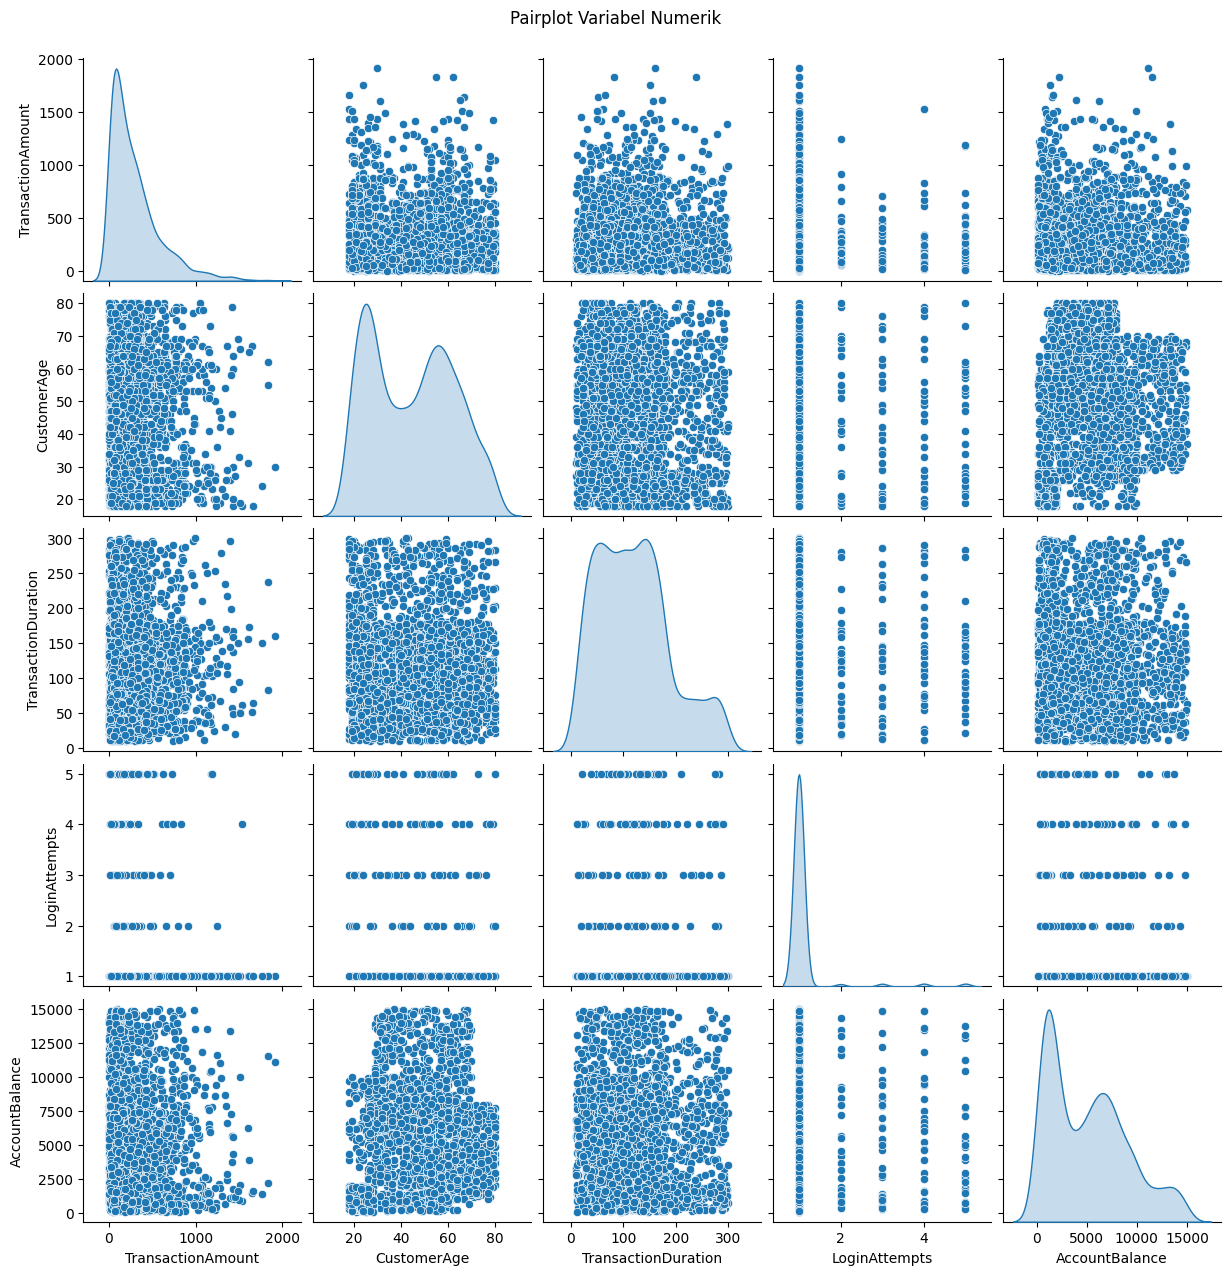

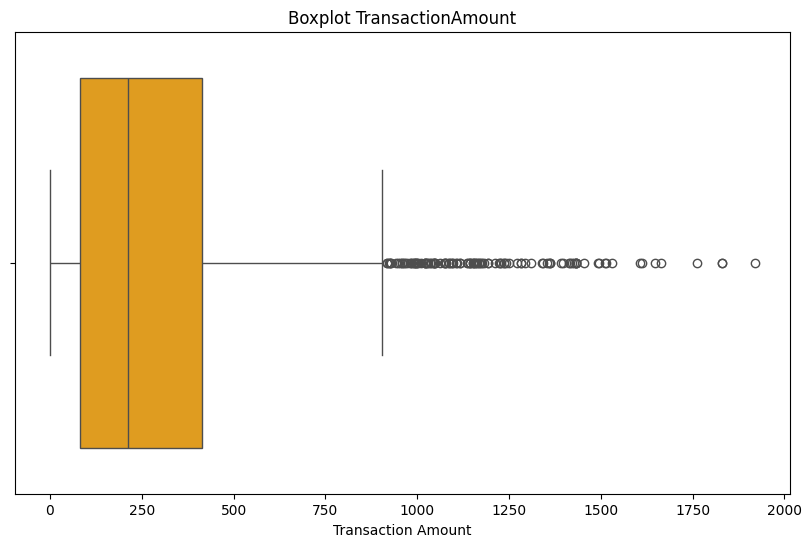

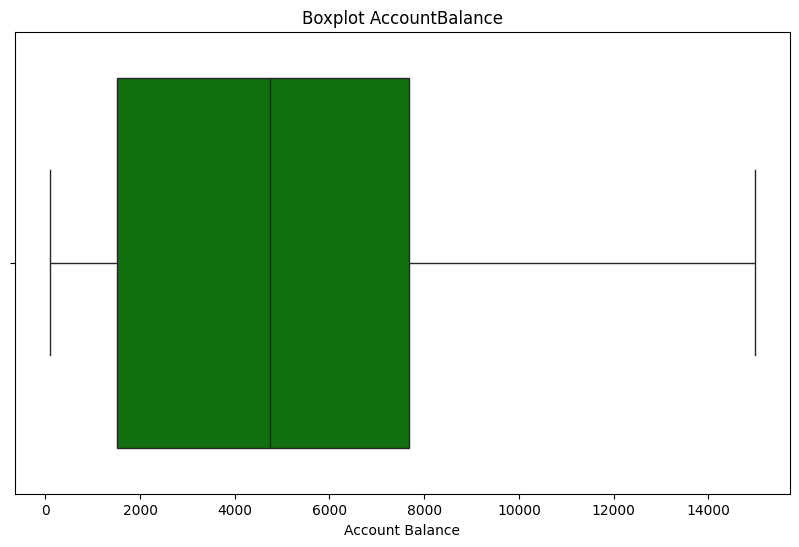

<ipython-input-40-9b661811ebd0>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TransactionType', data=df, palette='coolwarm')


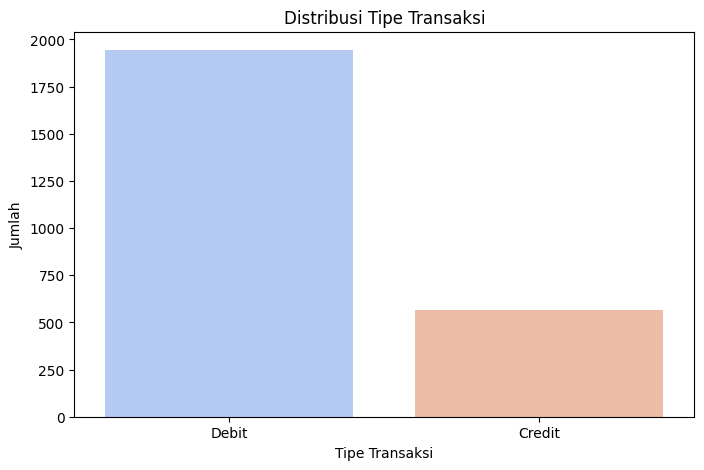

<ipython-input-40-9b661811ebd0>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Channel', data=df, palette='viridis')


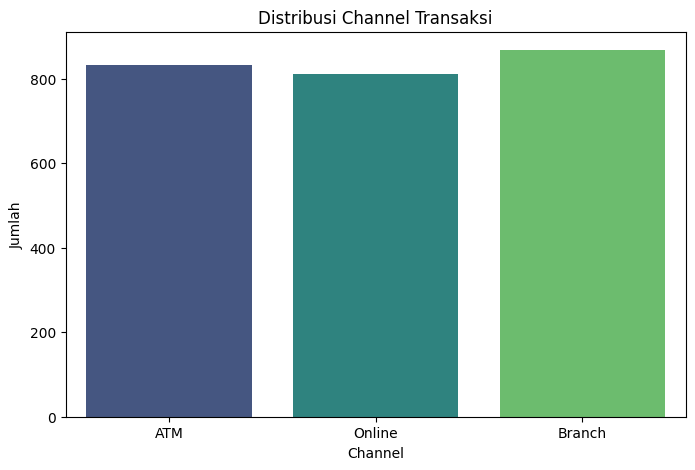

<ipython-input-40-9b661811ebd0>:72: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='TransactionType', y='TransactionAmount', data=df, palette='Set2')


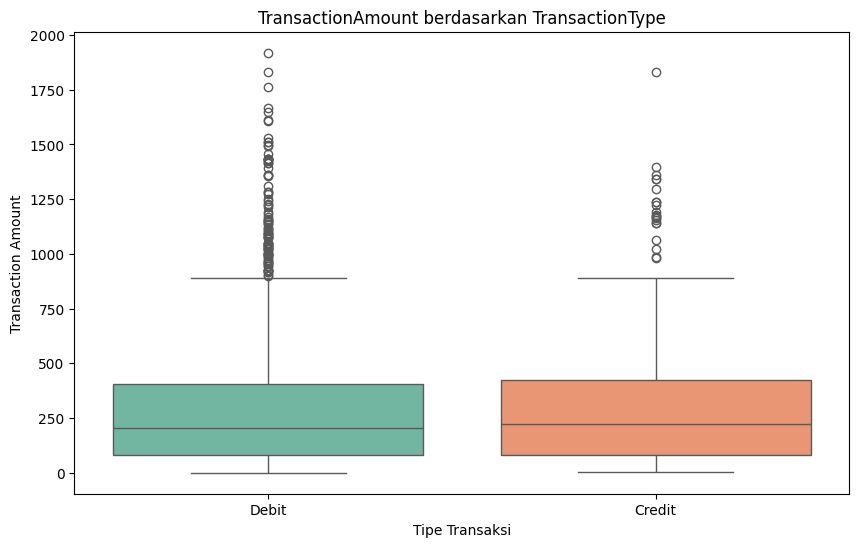

<ipython-input-40-9b661811ebd0>:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Channel', y='TransactionAmount', data=df, palette='Set1')


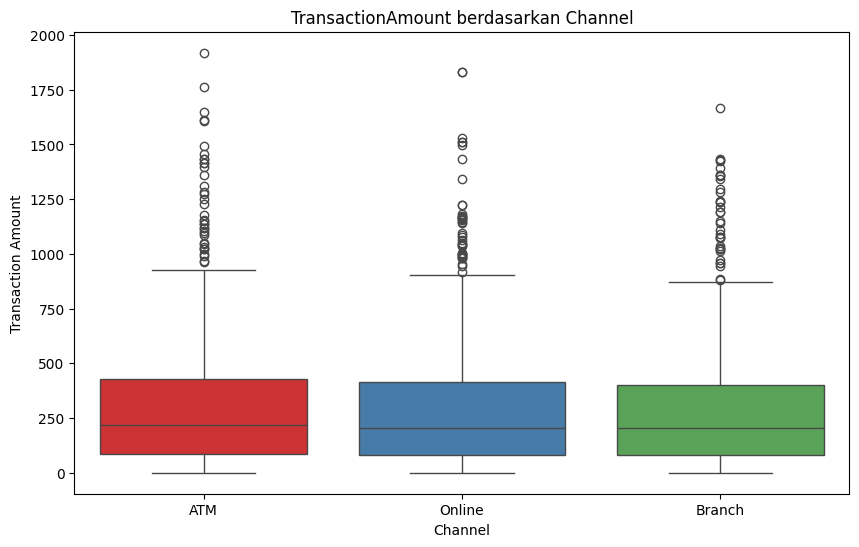

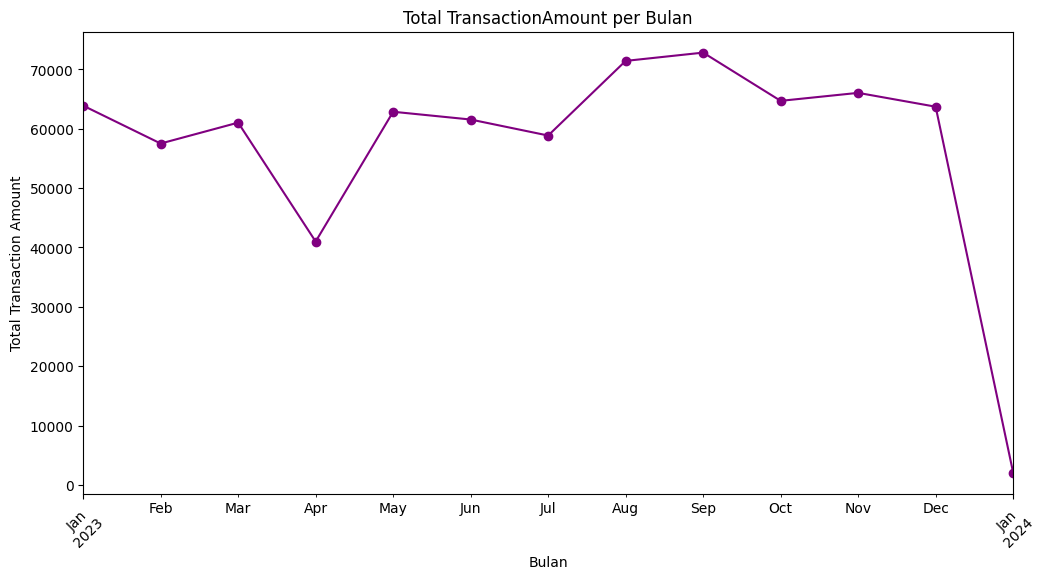

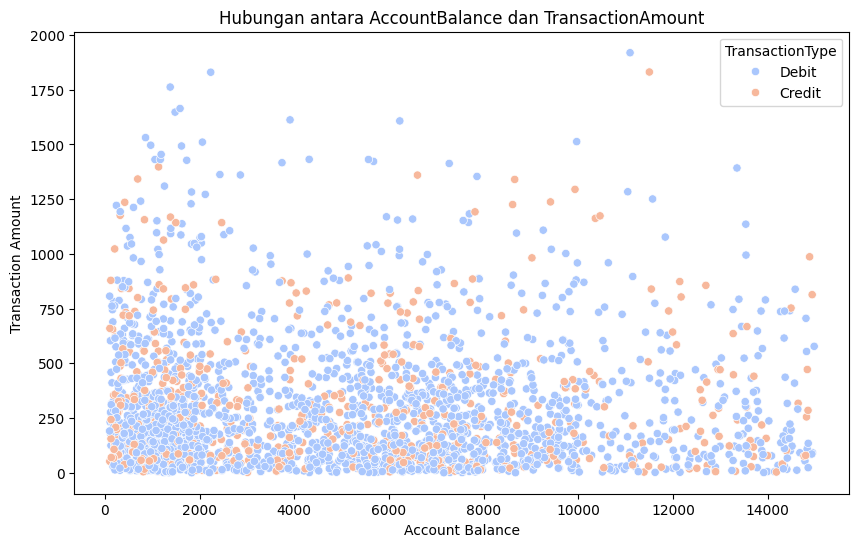


Crosstab Channel dan TransactionType:
 TransactionType  Credit  Debit
Channel                       
ATM                  73    760
Branch              251    617
Online              244    567


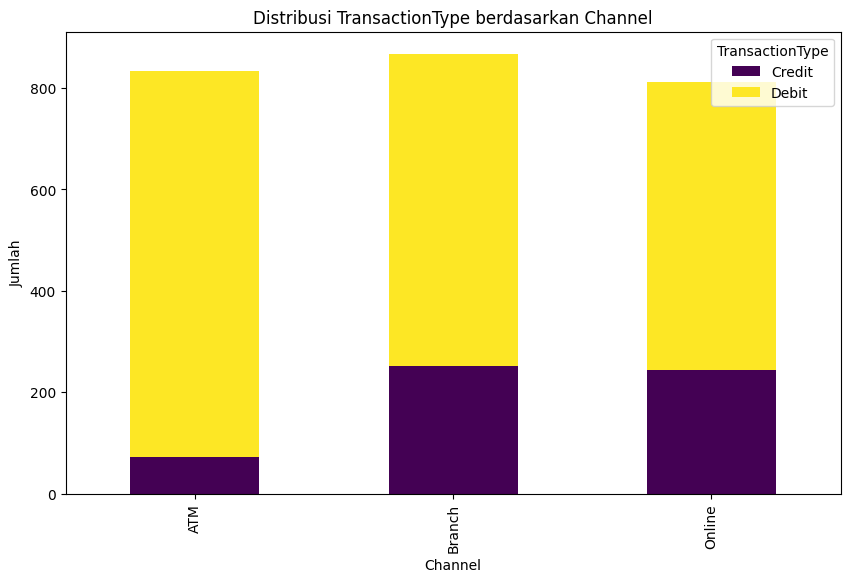

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi Data

# Visualisasi 1: Distribusi TransactionAmount
plt.figure(figsize=(10, 6))
sns.histplot(df['TransactionAmount'], kde=True, color='blue')
plt.title('Distribusi TransactionAmount')
plt.xlabel('Transaction Amount')
plt.ylabel('Frekuensi')
plt.show()

# Visualisasi 2: Matriks Korelasi Variabel Numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriks Korelasi Variabel Numerik')
plt.show()

# Visualisasi 3: Distribusi CustomerAge
plt.figure(figsize=(10, 6))
sns.histplot(df['CustomerAge'], bins=30)
plt.title('Distribusi CustomerAge')
plt.show()

# Visualisasi 4: Jumlah Transaksi per Lokasi
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Location', order=df['Location'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Jumlah Transaksi per Lokasi')
plt.show()

# Visualisasi 5: Pairplot Variabel Numerik
sns.pairplot(df[numeric_cols], diag_kind='kde')
plt.suptitle('Pairplot Variabel Numerik', y=1.02)
plt.show()

# Visualisasi 6: Analisis Outlier - Boxplot TransactionAmount
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['TransactionAmount'], color='orange')
plt.title('Boxplot TransactionAmount')
plt.xlabel('Transaction Amount')
plt.show()

# Visualisasi 7: Analisis Outlier - Boxplot AccountBalance
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['AccountBalance'], color='green')
plt.title('Boxplot AccountBalance')
plt.xlabel('Account Balance')
plt.show()

# Visualisasi 8: Distribusi Variabel Kategorikal - TransactionType
plt.figure(figsize=(8, 5))
sns.countplot(x='TransactionType', data=df, palette='coolwarm')
plt.title('Distribusi Tipe Transaksi')
plt.xlabel('Tipe Transaksi')
plt.ylabel('Jumlah')
plt.show()

# Visualisasi 9: Distribusi Variabel Kategorikal - Channel
plt.figure(figsize=(8, 5))
sns.countplot(x='Channel', data=df, palette='viridis')
plt.title('Distribusi Channel Transaksi')
plt.xlabel('Channel')
plt.ylabel('Jumlah')
plt.show()

# Visualisasi 10: Hubungan Antar Variabel - TransactionAmount berdasarkan TransactionType
plt.figure(figsize=(10, 6))
sns.boxplot(x='TransactionType', y='TransactionAmount', data=df, palette='Set2')
plt.title('TransactionAmount berdasarkan TransactionType')
plt.xlabel('Tipe Transaksi')
plt.ylabel('Transaction Amount')
plt.show()

# Visualisasi 11: Hubungan Antar Variabel - TransactionAmount berdasarkan Channel
plt.figure(figsize=(10, 6))
sns.boxplot(x='Channel', y='TransactionAmount', data=df, palette='Set1')
plt.title('TransactionAmount berdasarkan Channel')
plt.xlabel('Channel')
plt.ylabel('Transaction Amount')
plt.show()

# Visualisasi 12: Analisis Tren Waktu (opsional, jika ada TransactionDate)
if 'TransactionDate' in df.columns:
    df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
    df['Month'] = df['TransactionDate'].dt.to_period('M')
    monthly_amount = df.groupby('Month')['TransactionAmount'].sum()
    plt.figure(figsize=(12, 6))
    monthly_amount.plot(kind='line', marker='o', color='purple')
    plt.title('Total TransactionAmount per Bulan')
    plt.xlabel('Bulan')
    plt.ylabel('Total Transaction Amount')
    plt.xticks(rotation=45)
    plt.show()

# Visualisasi 13: Hubungan Antar Variabel Numerik - Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AccountBalance', y='TransactionAmount', data=df, hue='TransactionType', palette='coolwarm')
plt.title('Hubungan antara AccountBalance dan TransactionAmount')
plt.xlabel('Account Balance')
plt.ylabel('Transaction Amount')
plt.show()

# Visualisasi 14: Analisis Kombinasi Variabel Kategorikal - Crosstab
channel_type = pd.crosstab(df['Channel'], df['TransactionType'])
print("\nCrosstab Channel dan TransactionType:\n", channel_type)
channel_type.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Distribusi TransactionType berdasarkan Channel')
plt.xlabel('Channel')
plt.ylabel('Jumlah')
plt.show()

**Penjelasan :**

Dalam tahap **Exploratory Data Analysis (EDA)** untuk dataset transaksi perbankan, langkah awal atau pertama yang saya lakukan adalah dengan memahami struktur data, termasuk jumlah baris (2512) dan kolom, serta tipe data masing-masing kolom yang terdiri dari kombinasi numerik (seperti TransactionAmount, AccountBalance, CosttumerAge) dan kategorikal (seperti TransactionType, Channel, CustomerOccupation). Selanjutnya, data yang hilang diidentifikasi. Analisis distribusi dan korelasi dilakukan dengan menghitung statistik deskriptif untuk variabel numerik, yang memberikan gambaran tentang rentang, rata-rata, dan deviasi standar, serta matriks korelasi untuk mengidentifikasi hubungan antar variabel numerik, seperti korelasi rendah antara `TransactionAmount` dan `AccountBalance`, yang menunjukkan bahwa variabel ini memberikan informasi unik untuk clustering.

Kemudian, tahap visualisasi data dilakukan untuk memperdalam wawasan melalui berbagai grafik, seperti histogram `TransactionAmount` dan `CustomerAge` yang mengungkap distribusi nilai transaksi dan demografi pelanggan, serta countplot untuk variabel kategorikal seperti `TransactionType` dan `Channel` yang menunjukkan preferensi transaksi (misalnya dominasi transaksi Debit atau Online). Boxplot digunakan untuk mendeteksi outlier pada `TransactionAmount` dan `AccountBalance`, mengindikasikan potensi transaksi tidak biasa, sementara scatter plot dan crosstab (misalnya antara `Channel` dan `TransactionType`) membantu memahami hubungan antar variabel, seperti kecenderungan transaksi besar dilakukan secara online. Analisis tren waktu (jika ada `TransactionDate`) dan pairplot variabel numerik juga memberikan gambaran pola musiman dan hubungan antar fitur, yang semuanya menjadi dasar untuk preprocessing dan clustering selanjutnya.

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [ ]:
# Simpan salinan data asli sebelum preprocessing
df_original = df.copy()

# 2. Pilih fitur untuk clustering
features = ['TransactionAmount', 'CustomerAge', 'AccountBalance', 'TransactionType', 'CustomerOccupation']
df_selected = df[features].copy()

# --- 5. Data Preprocessing ---
print("\n5. Data Preprocessing")

# 1. Menghapus atau Menangani Data Kosong (Missing Values)
print("Jumlah Missing Value:")
print(df_selected.isnull().sum())
df_selected.dropna(inplace=True)
print("Jumlah baris setelah hapus data kosong:", df_selected.shape[0])

# 2. Menampilkan jumlah data duplikat
duplicate_rows = df_selected[df_selected.duplicated()]
print(f"Jumlah duplikat dalam dataset: {duplicate_rows.shape[0]}")
if not duplicate_rows.empty:
    print("\nData yang terduplikasi:")
    print(duplicate_rows)
else:
    print("\nTidak ada data duplikat dalam dataset.")
df_selected.drop_duplicates(inplace=True)
print("Jumlah baris setelah hapus duplikat:", df_selected.shape[0])

# 3. Proses Normalisasi atau Standarisasi pada Kolom Numerik
numerical_features = ['TransactionAmount', 'CustomerAge', 'AccountBalance']
scaler = StandardScaler()
df_selected[numerical_features] = scaler.fit_transform(df_selected[numerical_features])
print("\nHasil Normalisasi pada Kolom Numerik:")
print(df_selected[numerical_features].head())


# 4. Encoding Data Kategorikal
label_encoders = {}
label_encoders['TransactionType'] = LabelEncoder()
label_encoders['CustomerOccupation'] = LabelEncoder()

df_selected['TransactionType'] = label_encoders['TransactionType'].fit_transform(df_selected['TransactionType'])
df_selected['CustomerOccupation'] = label_encoders['CustomerOccupation'].fit_transform(df_selected['CustomerOccupation'])

# 5. Binning (Pengelompokan Data)
df_selected['Kategori_Usia'] = pd.cut(df_selected['CustomerAge'], bins=4, labels=['Muda', 'Dewasa', 'Paruh Baya', 'Lansia'])
df_selected['Kategori_Usia'] = LabelEncoder().fit_transform(df_selected['Kategori_Usia'])
print("\nDistribusi Kategori Usia:")
print(df_selected['Kategori_Usia'].value_counts())


5. Data Preprocessing
Jumlah Missing Value:
TransactionAmount     0
CustomerAge           0
AccountBalance        0
TransactionType       0
CustomerOccupation    0
dtype: int64
Jumlah baris setelah hapus data kosong: 2512
Jumlah duplikat dalam dataset: 0

Tidak ada data duplikat dalam dataset.
Jumlah baris setelah hapus duplikat: 2512

Hasil Normalisasi pada Kolom Numerik:
   TransactionAmount  CustomerAge  AccountBalance
0          -0.971275     1.423718       -0.000537
1           0.269440     1.311287        2.216472
2          -0.586882    -1.443277       -1.023534
3          -0.387456    -1.049768        0.885797
4          -0.973468    -1.049768        0.593589

Distribusi Kategori Usia:
Kategori_Usia
2    901
3    710
0    505
1    396
Name: count, dtype: int64


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [ ]:
# 1. Pilih algoritma clustering (K-Means) dengan jumlah cluster awal, misalnya 3
model_kmeans = KMeans(n_clusters=3, random_state=42)

# 2. Latih model dengan data yang telah diproses (df)
model_kmeans.fit(df_selected)

# Tambahkan label cluster ke DataFrame
df_selected['Cluster'] = model_kmeans.labels_

print("Model K-Means telah dilatih dengan 3 cluster.")

Model K-Means telah dilatih dengan 3 cluster.


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

Silhouette Score untuk k=2: 0.277
Silhouette Score untuk k=3: 0.404
Silhouette Score untuk k=4: 0.406
Silhouette Score untuk k=5: 0.410
Silhouette Score untuk k=6: 0.389
Silhouette Score untuk k=7: 0.381
Silhouette Score untuk k=8: 0.392
Silhouette Score untuk k=9: 0.384
Silhouette Score untuk k=10: 0.386

Cluster optimal berdasarkan Elbow Method: k=3
Cluster optimal berdasarkan Silhouette Score: k=5
Silhouette Score optimal: 0.410


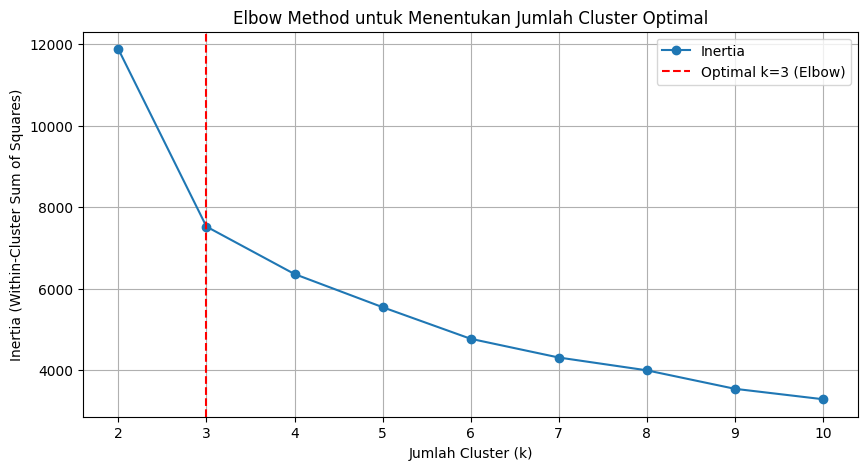

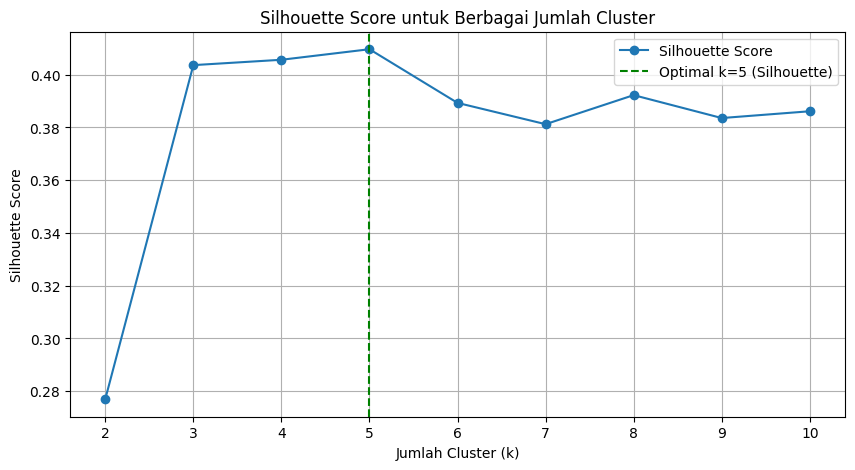

In [ ]:
# --- Evaluasi dengan Elbow Method dan Silhouette Score ---
# Rentang jumlah cluster yang akan dievaluasi
range_n_clusters = range(2, 11)  # Dari 2 hingga 10 cluster

# List untuk menyimpan inertia (Elbow Method) dan Silhouette Score
inertia = []
silhouette_scores = []

# Latih KMeans untuk setiap jumlah cluster dan hitung metrik evaluasi
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df_selected)

    # Simpan inertia (within-cluster sum of squares)
    inertia.append(kmeans.inertia_)

    # Hitung Silhouette Score
    silhouette_avg = silhouette_score(df_selected, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score untuk k={n_clusters}: {silhouette_avg:.3f}")

# --- Tentukan Cluster Optimal ---
# 1. Elbow Method: Cari titik siku berdasarkan perubahan inertia
inertia_diff = np.diff(inertia)  # Selisih inertia antar k
inertia_diff2 = np.diff(inertia_diff)  # Percepatan perubahan inertia
elbow_optimal = range_n_clusters[np.argmax(inertia_diff2) + 1]  # Tambah 1 karena diff mengurangi panjang

# 2. Silhouette Score: Cari nilai k dengan skor tertinggi
silhouette_optimal = range_n_clusters[np.argmax(silhouette_scores)]

silhouette_optimal_score = max(silhouette_scores)
print(f"\nCluster optimal berdasarkan Elbow Method: k={elbow_optimal}")
print(f"Cluster optimal berdasarkan Silhouette Score: k={silhouette_optimal}")
print(f"Silhouette Score optimal: {silhouette_optimal_score:.3f}")

# --- Visualisasi Elbow Method ---
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, inertia, marker='o', label='Inertia')
plt.axvline(x=elbow_optimal, color='r', linestyle='--', label=f'Optimal k={elbow_optimal} (Elbow)')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.legend()
plt.grid(True)
plt.show()

# --- Visualisasi Silhouette Score ---
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o', label='Silhouette Score')
plt.axvline(x=silhouette_optimal, color='g', linestyle='--', label=f'Optimal k={silhouette_optimal} (Silhouette)')
plt.title('Silhouette Score untuk Berbagai Jumlah Cluster')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

Silhouette Score untuk k=2: 0.422
Silhouette Score untuk k=3: 0.461
Silhouette Score untuk k=4: 0.387
Silhouette Score untuk k=5: 0.407
Silhouette Score untuk k=6: 0.408
Silhouette Score untuk k=7: 0.403
Silhouette Score untuk k=8: 0.389
Silhouette Score untuk k=9: 0.395
Silhouette Score untuk k=10: 0.393

Cluster optimal berdasarkan Elbow Method: k=3
Cluster optimal berdasarkan Silhouette Score: k=3
Silhouette Score optimal sebelum PCA: 0.410
Silhouette Score optimal (PCA): 0.461
Peningkatan Silhouette Score: 0.051


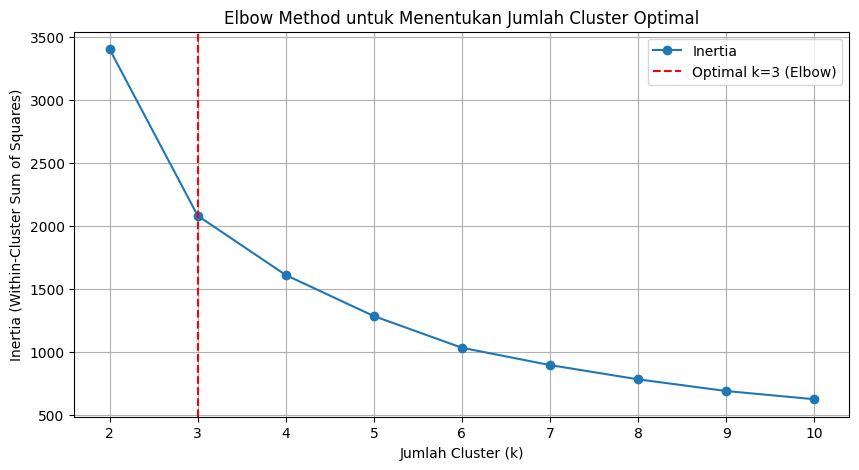

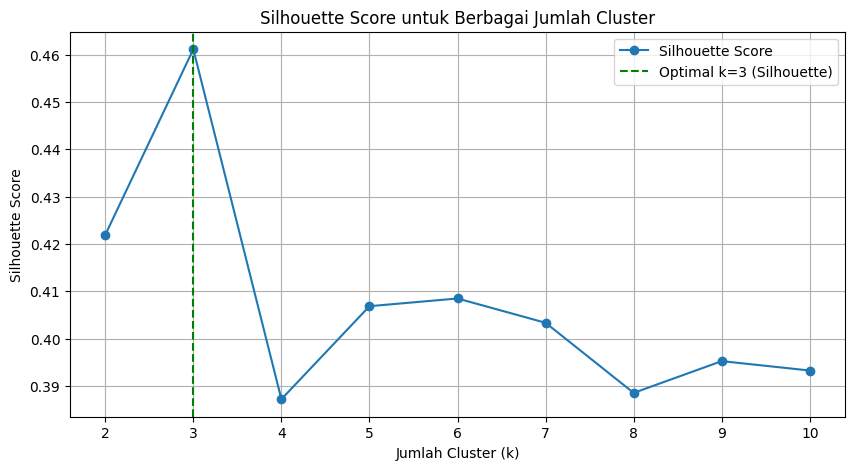

In [ ]:
# Asumsikan df_selected adalah DataFrame yang berisi data yang akan dikluster
# Misalnya: df_selected = pd.read_csv('data.csv')
# Pastikan df_selected sudah didefinisikan sebelum menjalankan kode ini

# 2. Terapkan PCA dengan 2 komponen
pca = PCA(n_components=2)  # PCA dibatasi hanya 2 komponen untuk visualisasi
df_pca = pca.fit_transform(df_selected[numerical_features])


# 3. Evaluasi Clustering dengan Elbow Method dan Silhouette Score
range_n_clusters = range(2, 11)  # Rentang jumlah cluster dari 2 hingga 10

# List untuk menyimpan inertia dan Silhouette Score
inertia = []
silhouette_scores = []

# Latih KMeans untuk setiap jumlah cluster pada data yang direduksi
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)  # n_init=10 untuk performa lebih baik
    kmeans.fit(df_pca)

    # Simpan inertia (within-cluster sum of squares)
    inertia.append(kmeans.inertia_)

    # Hitung Silhouette Score
    silhouette_avg = silhouette_score(df_pca, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    print(f"Silhouette Score untuk k={n_clusters}: {silhouette_avg:.3f}")

# 4. Tentukan Cluster Optimal
# Elbow Method: Cari titik siku berdasarkan perubahan inertia
inertia_diff = np.diff(inertia)  # Selisih inertia antar k
inertia_diff2 = np.diff(inertia_diff)  # Percepatan perubahan inertia
elbow_optimal = range_n_clusters[np.argmax(inertia_diff2) + 1]  # +1 karena diff mengurangi panjang

# Silhouette Score: Cari nilai k dengan skor tertinggi
silhouette_optimal = range_n_clusters[np.argmax(silhouette_scores)]

silhouette_optimal_score_pca = max(silhouette_scores)  # Ambil nilai tertinggi dari silhouette_scores
print(f"\nCluster optimal berdasarkan Elbow Method: k={elbow_optimal}")
print(f"Cluster optimal berdasarkan Silhouette Score: k={silhouette_optimal}")
print(f"Silhouette Score optimal sebelum PCA: {silhouette_optimal_score:.3f}")
print(f"Silhouette Score optimal (PCA): {silhouette_optimal_score_pca:.3f}")

peningkatan = silhouette_optimal_score_pca - silhouette_optimal_score
print(f"Peningkatan Silhouette Score: {peningkatan:.3f}")


# 5. Visualisasi Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, inertia, marker='o', label='Inertia')
plt.axvline(x=elbow_optimal, color='r', linestyle='--', label=f'Optimal k={elbow_optimal} (Elbow)')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.legend()
plt.grid(True)
plt.show()

# 6. Visualisasi Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(range_n_clusters, silhouette_scores, marker='o', label='Silhouette Score')
plt.axvline(x=silhouette_optimal, color='g', linestyle='--', label=f'Optimal k={silhouette_optimal} (Silhouette)')
plt.title('Silhouette Score untuk Berbagai Jumlah Cluster')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.legend()
plt.grid(True)
plt.show()




## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

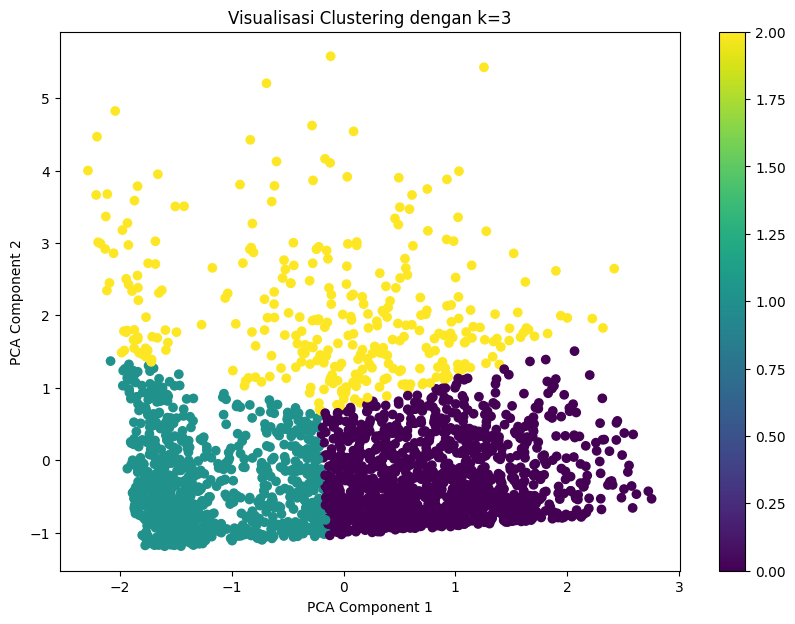

Kontribusi fitur asli terhadap komponen utama PCA:
     TransactionAmount  CustomerAge  AccountBalance
PC1          -0.110177     0.702840        0.702763
PC2           0.993912     0.077198        0.078616


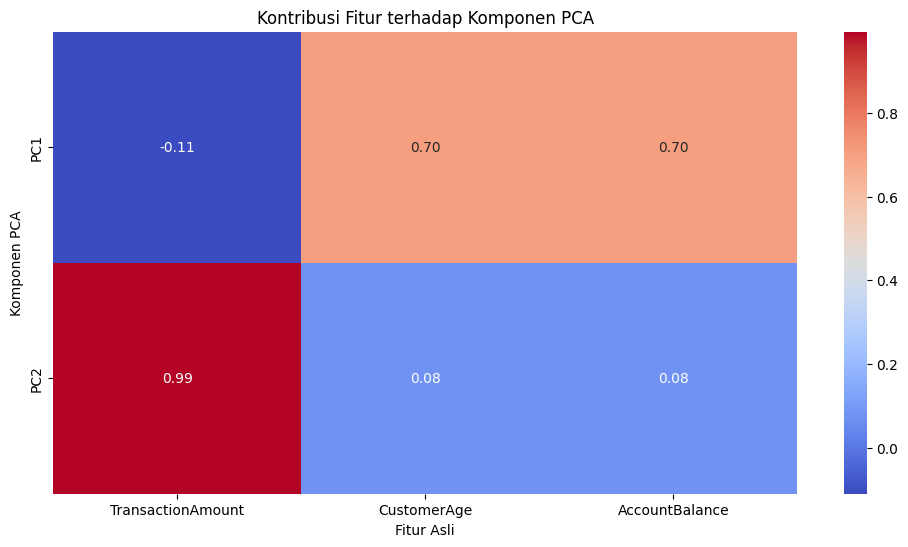

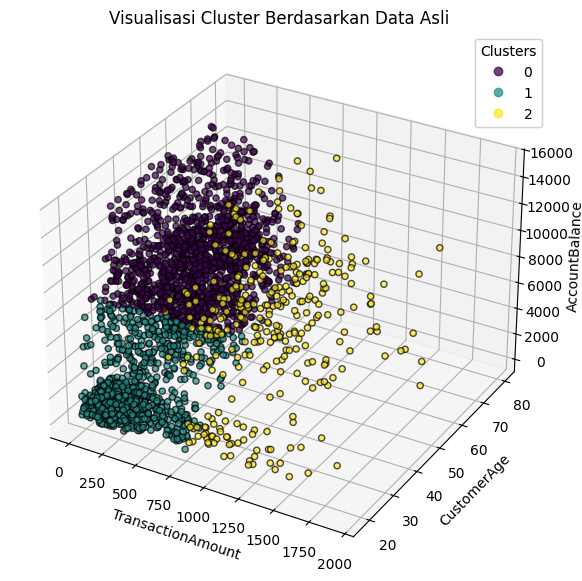

In [ ]:
# Visualisasi Clustering dengan k optimal berdasarkan Silhouette Score
kmeans_optimal = KMeans(n_clusters=silhouette_optimal, random_state=42, n_init=10)
kmeans_optimal.fit(df_pca)
labels = kmeans_optimal.labels_

plt.figure(figsize=(10, 7))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis')
plt.title(f'Visualisasi Clustering dengan k={silhouette_optimal}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar()
plt.show()

# Melihat kontribusi fitur asli terhadap masing-masing komponen utama
pca_components = pd.DataFrame(
    pca.components_,
    columns=numerical_features,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

print("Kontribusi fitur asli terhadap komponen utama PCA:")
print(pca_components)

# Visualisasi kontribusi fitur pada PCA
plt.figure(figsize=(12, 6))
sns.heatmap(pca_components, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Kontribusi Fitur terhadap Komponen PCA")
plt.xlabel("Fitur Asli")
plt.ylabel("Komponen PCA")
plt.show()

# Pastikan df_original memiliki label cluster
df_original['Cluster'] = kmeans_optimal.labels_

# Tentukan fitur yang digunakan
feature_x = 'TransactionAmount'
feature_y = 'CustomerAge'
feature_z = 'AccountBalance'

# Plot 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(df_original[feature_x],
                     df_original[feature_y],
                     df_original[feature_z],
                     c=df_original['Cluster'], cmap='viridis', alpha=0.7, edgecolors='k')

# Label dan judul
ax.set_xlabel(feature_x)
ax.set_ylabel(feature_y)
ax.set_zlabel(feature_z)
ax.set_title('Visualisasi Cluster Berdasarkan Data Asli')

# Tambahkan legenda
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.show()


## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [ ]:
df_selected['Cluster'] = kmeans_optimal.labels_

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [ ]:
numerical_features

['TransactionAmount', 'CustomerAge', 'AccountBalance']

In [ ]:
# 1. Inverse Transform untuk Kolom Numerik
df_selected[numerical_features] = scaler.inverse_transform(df_selected[numerical_features])
print("\nData numerik setelah inverse transform:")
print(df_selected[numerical_features].head())

# 2. Inverse Transform untuk Kolom Kategorikal
df_selected['TransactionType'] = label_encoders['TransactionType'].inverse_transform(df_selected['TransactionType'])
df_selected['CustomerOccupation'] = label_encoders['CustomerOccupation'].inverse_transform(df_selected['CustomerOccupation'])
print("\nData kategorikal setelah inverse transform:")
print(df_selected[['TransactionType', 'CustomerOccupation']].head())

# Tampilkan DataFrame akhir
print("\nDataFrame akhir dengan label cluster:")
print(df_selected.head())



Data numerik setelah inverse transform:
   TransactionAmount  CustomerAge  AccountBalance
0              14.09         70.0         5112.21
1             376.24         68.0        13758.91
2             126.29         19.0         1122.35
3             184.50         26.0         8569.06
4              13.45         26.0         7429.40

Data kategorikal setelah inverse transform:
  TransactionType CustomerOccupation
0           Debit             Doctor
1           Debit             Doctor
2           Debit            Student
3           Debit            Student
4          Credit            Student

DataFrame akhir dengan label cluster:
   TransactionAmount  CustomerAge  AccountBalance TransactionType  \
0              14.09         70.0         5112.21           Debit   
1             376.24         68.0        13758.91           Debit   
2             126.29         19.0         1122.35           Debit   
3             184.50         26.0         8569.06           Debit   
4       

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [ ]:
# Pilih fitur yang ingin dianalisis
selected_features = ['CustomerAge', 'TransactionAmount', 'AccountBalance']

# Menampilkan statistik hanya untuk fitur tertentu dalam bentuk DataFrame
cluster_summary_df = df_original.groupby('Cluster')[selected_features].agg(['count', 'mean', 'std', 'min', 'max']).reset_index()

# Tampilkan hasil sebagai DataFrame
display(cluster_summary_df)  # Jika menggunakan Jupyter Notebook



Cluster CustomerAge                               TransactionAmount  \
                count       mean        std min max             count   
0       0        1298  55.145609  13.529530  20  80              1298   
1       1         887  28.612176   9.819855  18  60               887   
2       2         327  46.675841  17.476157  18  80               327   

                                           AccountBalance               \
         mean         std     min      max          count         mean   
0  193.468968  149.464878    0.32   667.95           1298  7273.984661   
1  232.351015  180.629748    0.26   761.73            887  1841.470868   
2  887.882263  273.290912  501.30  1919.11            327  5419.303670   

                                  
           std     min       max  
0  3390.030633  624.09  14977.99  
1  1798.555206  101.25   9716.68  
2  3858.539035  102.20  14935.50

# **Analisis Karakteristik Cluster dari Model KMeans**

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans berdasarkan statistik pada gambar.

## **Cluster 0**  
- **Jumlah anggota:** 1298 pelanggan  
- **Rata-rata usia pelanggan:** 55.15 tahun (Rentang: 20 - 80)  
- **Rata-rata jumlah transaksi:** 193.47 (Rentang: 0.32 - 667.95)  
- **Rata-rata saldo akun:** 7,273.98 (Rentang: 624.09 - 14,977.99)  

### **Analisis:**  
- Cluster ini terdiri dari pelanggan **berusia lebih tua** dengan rata-rata 55 tahun, tetapi dengan rentang usia yang luas (20 - 80 tahun).  
- **Saldo akun tertinggi dibandingkan cluster lain**, dengan rata-rata lebih dari 7.000, menunjukkan kestabilan finansial.  
- Jumlah transaksi lebih rendah dibandingkan cluster lain, meskipun beberapa pelanggan memiliki transaksi tinggi.  
- **Strategi:** Tawarkan produk investasi, tabungan jangka panjang, dan layanan premium berbasis finansial.  

---

## **Cluster 1**  
- **Jumlah anggota:** 887 pelanggan  
- **Rata-rata usia pelanggan:** 28.61 tahun (Rentang: 18 - 60)  
- **Rata-rata jumlah transaksi:** 232.35 (Rentang: 0.26 - 761.73)  
- **Rata-rata saldo akun:** 1,841.47 (Rentang: 101.25 - 9,716.68)  

### **Analisis:**  
- Cluster ini mencerminkan **pelanggan muda** dengan usia rata-rata sekitar 28 tahun, meskipun ada yang lebih tua hingga 60 tahun.  
- Saldo akun relatif rendah dibandingkan cluster lain, menunjukkan daya beli yang lebih rendah atau pengeluaran yang lebih tinggi.  
- Rentang saldo akun cukup luas (101.25 - 9,716.68), mengindikasikan adanya segmen pelanggan yang masih berkembang finansialnya.  
- **Strategi:** Tawarkan **promo diskon, cashback, cicilan ringan, dan program loyalitas** untuk meningkatkan transaksi.  

---

## **Cluster 2**  
- **Jumlah anggota:** 327 pelanggan  
- **Rata-rata usia pelanggan:** 46.67 tahun (Rentang: 18 - 80)  
- **Rata-rata jumlah transaksi:** 887.88 (Rentang: 501.30 - 1,919.11)  
- **Rata-rata saldo akun:** 5,419.30 (Rentang: 102.20 - 14,935.50)  

### **Analisis:**  
- Cluster ini terdiri dari pelanggan **usia menengah dengan transaksi sangat tinggi**.  
- Saldo akun berada di antara Cluster 0 dan Cluster 1, dengan rentang yang cukup lebar, mengindikasikan beberapa pelanggan dengan saldo tinggi dan daya beli kuat.  
- **Jumlah transaksi yang sangat tinggi**, menunjukkan kelompok ini adalah pelanggan **paling aktif dalam berbelanja**.  
- **Strategi:** Prioritaskan mereka dengan **layanan eksklusif, program VIP, cashback besar, dan reward berbasis jumlah transaksi**.  

---

## **Kesimpulan & Rekomendasi**  
- **Cluster 0** → **Pelanggan lebih tua, saldo tinggi, transaksi lebih rendah** → **Fokus pada layanan tabungan, investasi, dan produk finansial jangka panjang.**  
- **Cluster 1** → **Pelanggan muda, saldo rendah-menengah, transaksi cukup tinggi** → **Dorong lebih banyak transaksi dengan diskon, cicilan, dan promo khusus.**  
- **Cluster 2** → **Pelanggan usia menengah, saldo tinggi, transaksi sangat tinggi** → **Tawarkan layanan premium, cashback besar, dan program loyalitas eksklusif.**  

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
# Mengekspor Data ke CSV
df_original.to_csv('hasil_clustering.csv', index=False)

print("File 'hasil_clustering.csv' berhasil disimpan.")


File 'hasil_clustering.csv' berhasil disimpan.
